<a href="https://colab.research.google.com/github/t-abs/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data=pd.read_csv("/content/data_for_lr (3).csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


DATA PROCESSING

In [10]:
data=data.dropna()


SPLITTING DATA

In [16]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
#valid data input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)


In [19]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"training input data shape = {test_input.shape}")
print(f"training output data shape = {test_output.shape}")


training input data shape = (500, 1)
training output data shape = (500, 1)
training input data shape = (199, 1)
training output data shape = (199, 1)


In [15]:
np.array(data.x[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

LINEAR REGRESSION


Forward prop
f(x)=m*x+c

In [20]:
def forward_propagation(train_input , parameters):
  m = parameters["m"]
  c=parameters["c"]
  predictions = np.multiply(m,train_input)+c
  return predictions

COST FUNCTION

Summation(1/2n*(y-f(x)^2)

In [24]:
def cost_function(predictions,train_output):
    cost= np.mean((train_output-predictions) ** 2) *0.5
    return cost


Gradient Descent For Backpropagation


df=summ(f(x)-y)/n

dm=df*c

dc=df*1

In [25]:
def  backward_propagation(train_input,train_output,predictions):
  derivatives = dict()
  df=predictions-train_output
  dm=np.mean(np.multiply(df,train_input))
  dc=np.mean(df)

  derivatives["dm"]=dm
  derivatives["dc"]=dc

  return derivatives


UPDATE PARAMETERS

m=m-(learning_rate *dm)


c=c-(learning_rate *dc)

In [26]:
def update_parameters(parameters,derivatives,learning_rate):
  parameters["m"]=parameters["m"]-learning_rate * derivatives["dm"]
  parameters["c"]=parameters["c"]-learning_rate * derivatives["dc"]
  return parameters

MODEL TRAINING

In [29]:

def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)
                #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss



Iteration = 1, Loss = 5353.541961842699


<Figure size 640x480 with 0 Axes>

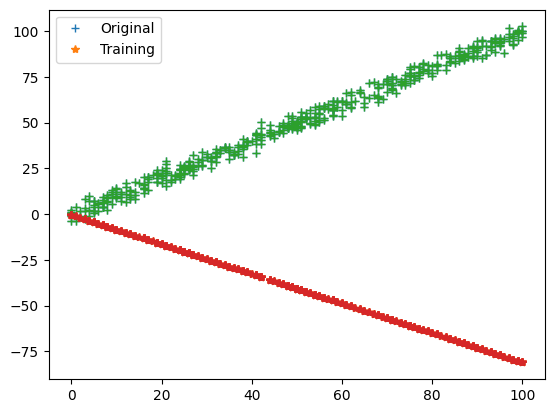

Iteration = 2, Loss = 2431.04594781569


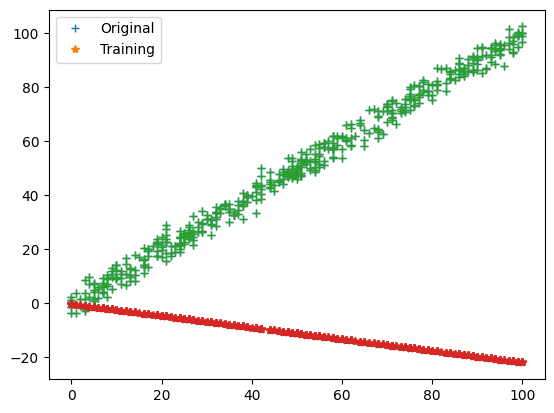

Iteration = 3, Loss = 1105.1062690837066


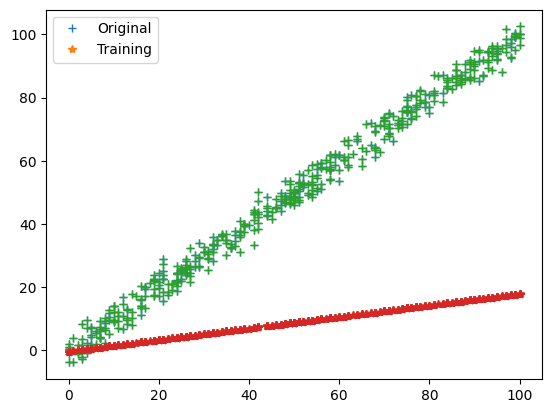

Iteration = 4, Loss = 503.5259680866803


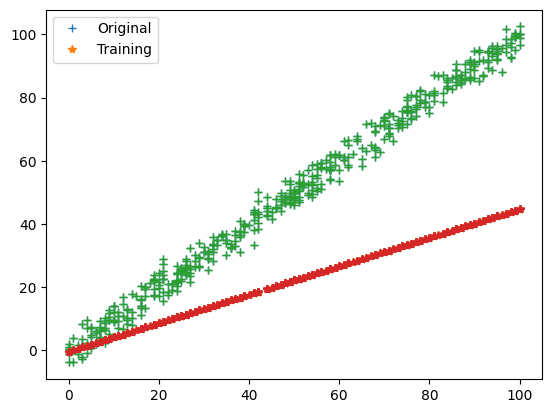

Iteration = 5, Loss = 230.58831909830914


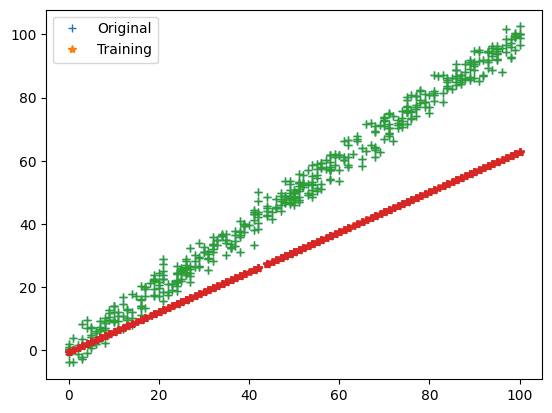

Iteration = 6, Loss = 106.75620534441529


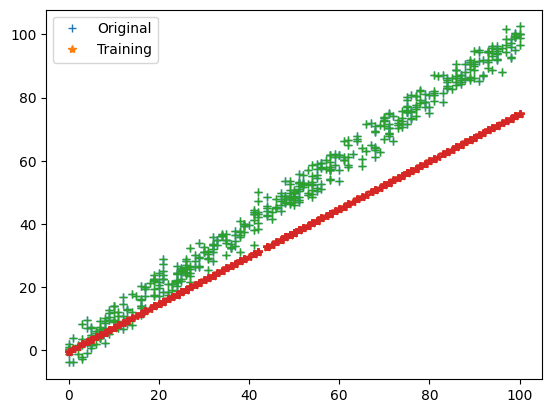

Iteration = 7, Loss = 50.5734380818445


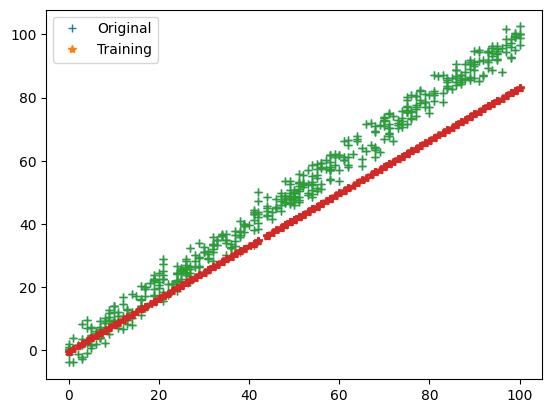

Iteration = 8, Loss = 25.083254253595864


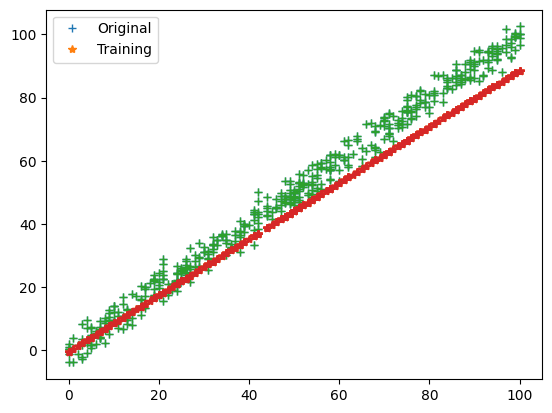

Iteration = 9, Loss = 13.518329525874137


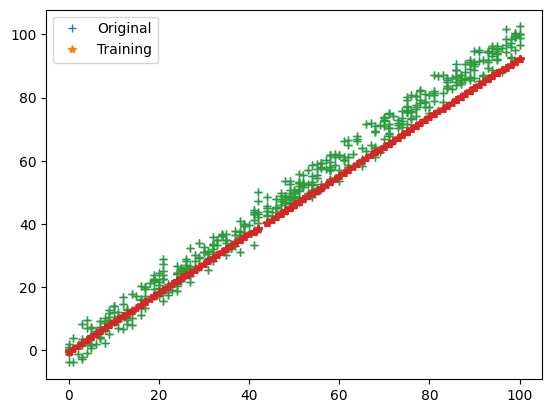

Iteration = 10, Loss = 8.27131027625698


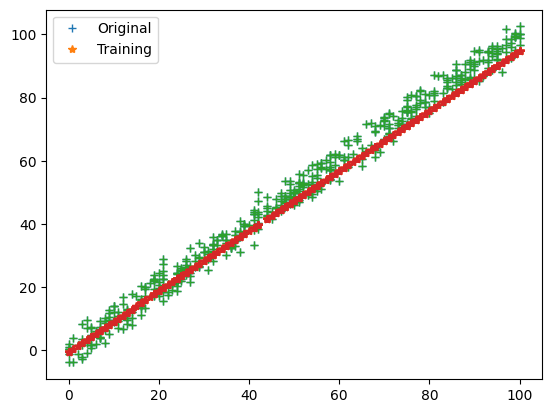

Iteration = 11, Loss = 5.890731740032884


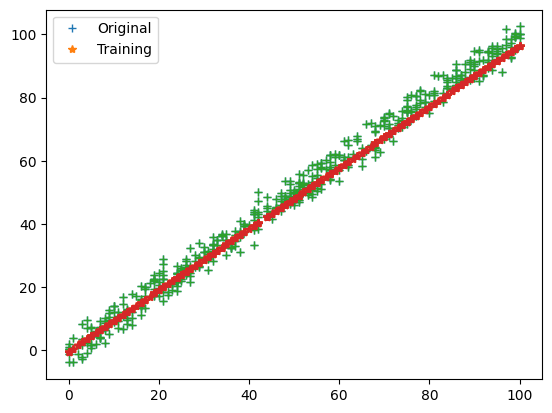

Iteration = 12, Loss = 4.81066053046768


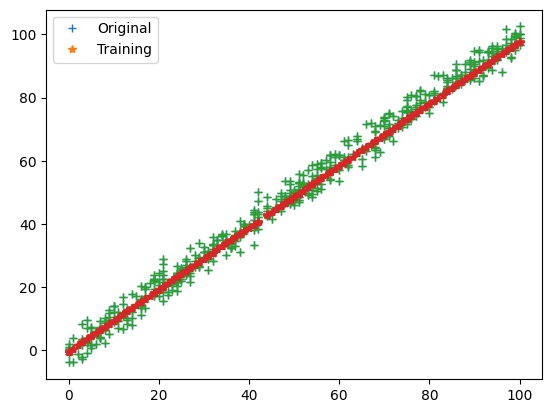

Iteration = 13, Loss = 4.320630935507727


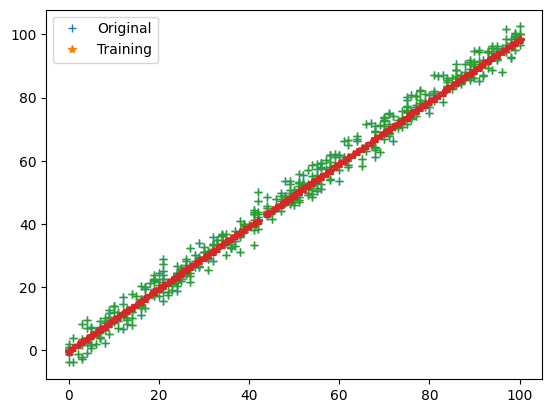

Iteration = 14, Loss = 4.098303874653146


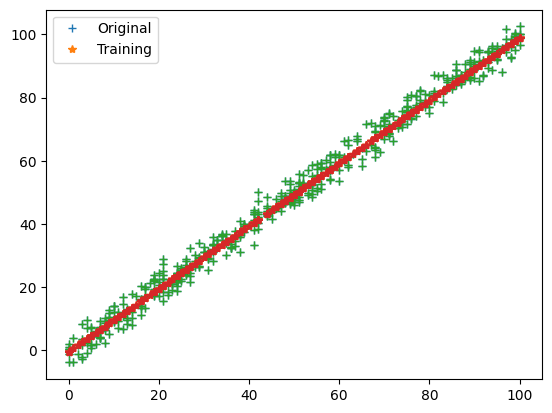

Iteration = 15, Loss = 3.997433750045114


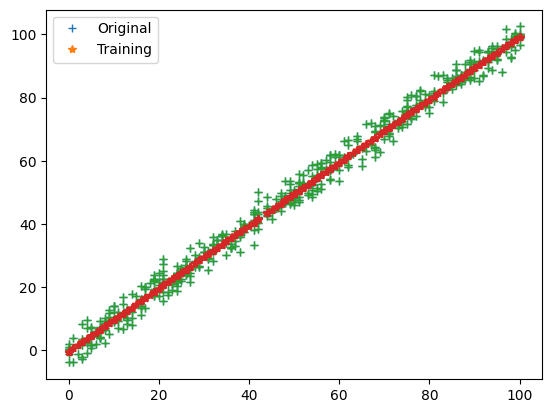

Iteration = 16, Loss = 3.951668771947425


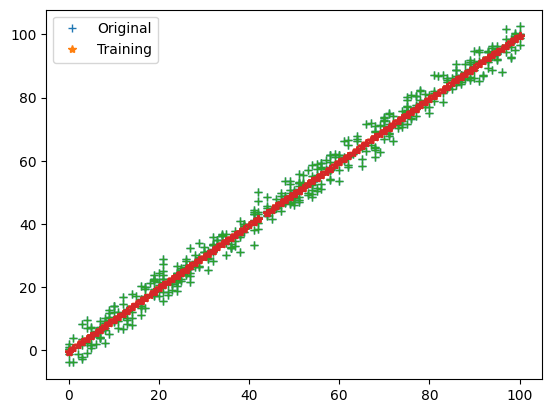

Iteration = 17, Loss = 3.9309050598627833


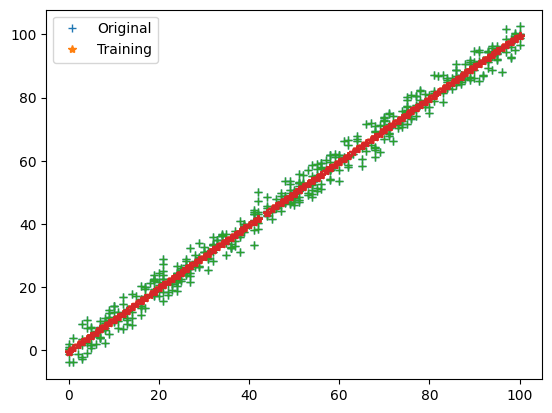

Iteration = 18, Loss = 3.921484449865273


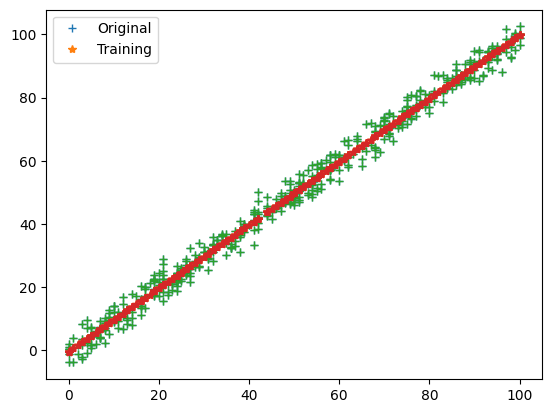

Iteration = 19, Loss = 3.917210217853354


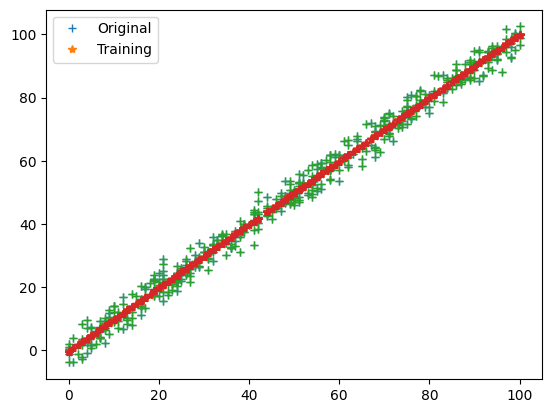

Iteration = 20, Loss = 3.9152709032384148


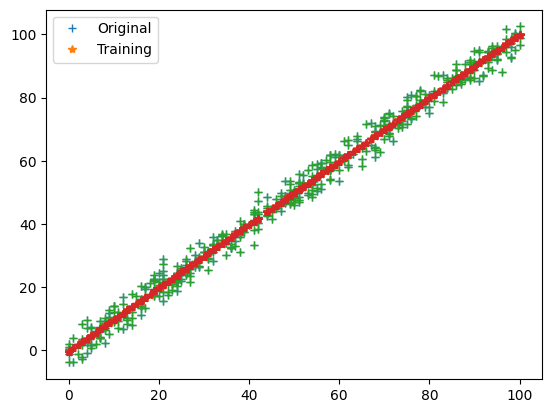

In [30]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [31]:
print(parameters)

{'m': 1.002781011675866, 'c': -0.3979019837592733}


In [32]:
loss

[5353.541961842699,
 2431.04594781569,
 1105.1062690837066,
 503.5259680866803,
 230.58831909830914,
 106.75620534441529,
 50.5734380818445,
 25.083254253595864,
 13.518329525874137,
 8.27131027625698,
 5.890731740032884,
 4.81066053046768,
 4.320630935507727,
 4.098303874653146,
 3.997433750045114,
 3.951668771947425,
 3.9309050598627833,
 3.921484449865273,
 3.917210217853354,
 3.9152709032384148]

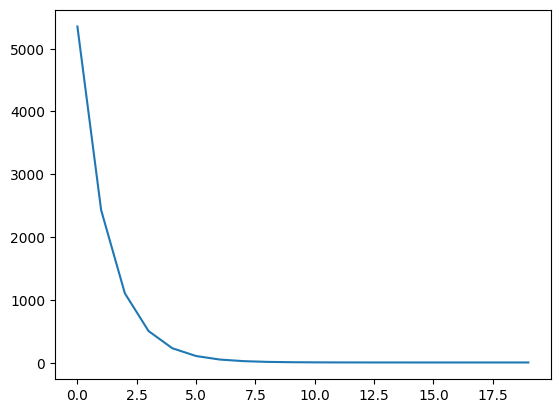

In [33]:
plt.plot(loss)

PREDICTION

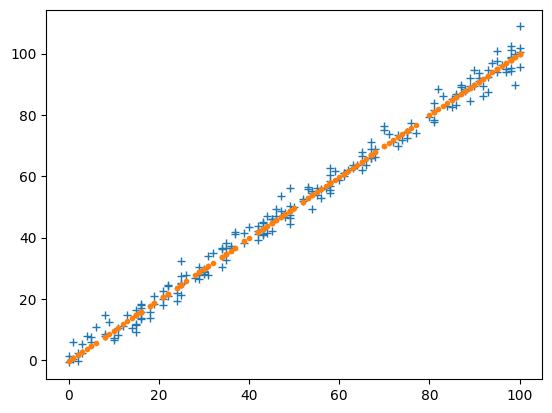

In [34]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [35]:
cost_function(test_predictions, test_output)

4.049174772490301